# Data Understanding and Data Preparation

In [57]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

## Part 1. Build DataFrame and Define ML Problem

In [58]:
filename = os.path.join(os.getcwd(), "..", "data", "airbnbData.csv")

In [59]:
df = pd.read_csv(filename)

/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_11132/2381305835.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


####  Inspect the Data


In [60]:
df.shape

(38277, 74)

In [61]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [62]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


#### Define the Label

In [63]:
df['price']

0        $150.00
1         $75.00
2         $60.00
3        $275.00
4         $68.00
          ...   
38272     $79.00
38273     $76.00
38274    $116.00
38275    $106.00
38276    $689.00
Name: price, Length: 38277, dtype: object

In [64]:
df['price'].dtype

dtype('O')

In [65]:
df['price'].unique()[:15]

array(['$150.00', '$75.00', '$60.00', '$275.00', '$68.00', '$98.00',
       '$89.00', '$65.00', '$62.00', '$90.00', '$199.00', '$96.00',
       '$299.00', '$140.00', '$175.00'], dtype=object)

In order for us to use the prices for modeling, we will have to transform the values in the `price` column from strings to floats. We will:

* remove the dollar signs (in this case, the platform forces the currency to be the USD, so we do not need to worry about targeting, say, the Japanese Yen sign, nor about converting the values into USD). 
* remove the commas from all values that are in the thousands or above: for example, `$2,500`. 

The code cell below accomplishes this.

In [66]:
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

In [67]:
df['price'].unique()[:15]

array([150.,  75.,  60., 275.,  68.,  98.,  89.,  65.,  62.,  90., 199.,
        96., 299., 140., 175.])

#### Identify Features

In [68]:
url_colnames = [col for col in df.columns if ('url' in col.lower())]
url_colnames

['listing_url',
 'picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [69]:
df = df.drop(url_colnames, axis=1)

In [70]:
df.shape

(38277, 69)

In [71]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',


## Part 2. Clean Your Data

Let's now handle outliers and missing data.

### a. Handle Outliers

Let us prepare the data in our label column. Namely, we will detect and replace outliers in the data using winsorization.

In [72]:
import scipy.stats as stats

In [73]:
df['label_price'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

Let's verify that the new column `label_price` was added to DataFrame `df`:

In [74]:
df.head()

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",...,4.86,4.41,NaN,f,3,3,0,0,0.33,150.0
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",...,4.71,4.64,NaN,f,1,1,0,0,4.86,75.0
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States",...,4.47,4.52,NaN,f,2,0,2,0,0.52,60.0
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",...,4.50,5.00,NaN,f,1,1,0,0,0.02,275.0
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",...,4.87,4.36,NaN,f,1,0,1,0,3.68,68.0


### b. Handle Missing Data

Next we are going to find missing values in our entire dataset and impute the missing values by
replace them with means.

#### Identifying missingness

In [75]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

id                                                 0
scrape_id                                          0
last_scraped                                       0
name                                              14
description                                     1192
                                                ... 
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9504
label_price                                        0
Length: 70, dtype: int64

In [76]:
nan_detected = nan_count != 0
nan_detected

id                                              False
scrape_id                                       False
last_scraped                                    False
name                                             True
description                                      True
                                                ...  
calculated_host_listings_count_entire_homes     False
calculated_host_listings_count_private_rooms    False
calculated_host_listings_count_shared_rooms     False
reviews_per_month                                True
label_price                                     False
Length: 70, dtype: bool

In [77]:
is_int_or_float = (df.dtypes == np.int64) | (df.dtypes == np.float64)
is_int_or_float

id                                               True
scrape_id                                        True
last_scraped                                    False
name                                            False
description                                     False
                                                ...  
calculated_host_listings_count_entire_homes      True
calculated_host_listings_count_private_rooms     True
calculated_host_listings_count_shared_rooms      True
reviews_per_month                                True
label_price                                      True
Length: 70, dtype: bool

In [78]:
to_impute = nan_detected & is_int_or_float

In [79]:
df.columns[to_impute]

Index(['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')

We just identified and displayed the list of candidate columns for potentially replacing missing values with the column mean.

In [80]:
to_impute_selected = ['host_listings_count', 'host_total_listings_count', 'bathrooms',
       'bedrooms', 'beds']

#### Keeping record of the missingness: creating dummy variables 

In [81]:
for col in to_impute_selected:
    df[f'{col}_na'] = df[col].isnull()

Check that the DataFrame contains the new variables:

In [82]:
df.head()

,id,scrape_id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price,host_listings_count_na,host_total_listings_count_na,bathrooms_na,bedrooms_na,beds_na
0,2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",...,3,0,0,0.33,150.0,False,False,True,True,False
1,3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",...,1,0,0,4.86,75.0,False,False,True,False,False
2,5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,7356,Garon,2009-02-03,"New York, New York, United States",...,0,2,0,0.52,60.0,False,False,True,False,False
3,5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States",...,1,0,0,0.02,275.0,False,False,True,False,False
4,5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",...,0,1,0,3.68,68.0,False,False,True,False,False


#### Replacing the missing values with mean values of the column

In [83]:
for colname in to_impute_selected:
    mean = df[colname].mean()
    df[colname].fillna(value=mean, inplace=True)

/var/folders/hw/cs9r1s7d1g17952tm8lznrjw0000gn/T/ipykernel_11132/2215992343.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].fillna(value=mean, inplace=True)


In [84]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))


host_listings_count missing values count :0
host_total_listings_count missing values count :0
bathrooms missing values count :38277
bedrooms missing values count :0
beds missing values count :0


Why did the `bathrooms` column retain missing values after our imputation?

In [85]:
df['bathrooms'].unique()

array([nan])

The column did not contain a single value (except the `NaN` indicator) to begin with.

## Part 3. Perform One-Hot Encoding

In [86]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour', nan,
       'within a few hours'], dtype=object)

In [87]:
df['host_response_time'] = df['host_response_time'].fillna('unavailable')

Let's inspect the `host_response_time` column to see the new values.

In [88]:
df['host_response_time'].unique()

array(['within a day', 'a few days or more', 'within an hour',
       'unavailable', 'within a few hours'], dtype=object)

In [89]:
df_host_response_time = pd.get_dummies(df['host_response_time'])
df_host_response_time

,a few days or more,unavailable,within a day,within a few hours,within an hour
0,False,False,True,False,False
1,True,False,False,False,False
2,False,False,False,False,True
3,False,False,True,False,False
4,False,False,True,False,False
...,...,...,...,...,...
38272,False,False,False,True,False
38273,False,False,False,True,False
38274,False,False,False,False,True
38275,False,False,False,False,True


In [90]:
df = pd.concat([df, df_host_response_time], axis=1)
df = df.drop(['host_response_time'], axis=1)

Let's inspect DataFrame `df` to see the changes that have been made.

In [91]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_3

#### One-hot encode additional features

In [92]:
to_encode = list(df.select_dtypes(include=['object']).columns)
df[to_encode].nunique()

last_scraped                        2
name                            36869
description                     34133
neighborhood_overview           18616
host_name                        9123
host_since                       4289
host_location                    1747
host_about                      14423
host_response_rate                 88
host_acceptance_rate              101
host_is_superhost                   2
host_neighbourhood                484
host_verifications                525
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     207
neighbourhood_cleansed            222
neighbourhood_group_cleansed        5
property_type                      78
room_type                           4
bathrooms_text                     30
amenities                       31740
has_availability                    2
calendar_last_scraped               2
first_review                     3171
last_review                      2560
license     

In [93]:
print(df['last_scraped'].unique())
print(df['host_is_superhost'].unique())
print(df['host_has_profile_pic'].unique())
print(df['host_identity_verified'].unique())
print(df['neighbourhood_group_cleansed'].unique())
print(df['room_type'].unique())
print(df['has_availability'].unique())
print(df['calendar_last_scraped'].unique())
print(df['instant_bookable'].unique())

['2021-12-05' '2021-12-04']
['f' 't' nan]
['t' 'f' nan]
['t' 'f' nan]
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
['t' 'f']
['2021-12-05' '2021-12-04']
['f' 't']



Features selected for one hot encoding- last_scraped, host_is_superhost, host_has_profile_pic, host_identity_verified, neighbourhood_group_cleansed, room_type, has_availability, calendar_last_scraped, instant_bookable


I think these features will be suitable for one hot encoding as they are categorical variables and by one hot encoding we can convert these variables into a binary representation. Also, these selected features have very few values so it will be easier to one hot encode them as opposed to features with 31740 values (eg amenities). The other variables with string representation containing a lot of values can also be one hot encoded but we would need to convert the top 10 most frequent values.

In [94]:
df['host_is_superhost']
df_host_is_superhost = pd.get_dummies(df['host_is_superhost'], prefix='host_is_superhost_')
df_host_is_superhost
df = df.join(df_host_is_superhost)
df.drop(columns = 'host_is_superhost', inplace = True)

In [95]:
df.columns

Index(['id', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped'

## Part 4. Explore Data

#### Identify Correlations


In [96]:
corr_matrix = round(df.select_dtypes('number').corr(),5)
corr_matrix

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,label_price
id,1.00000,NaN,0.58617,0.12986,0.12986,0.01000,0.08708,0.03540,NaN,0.04503,...,-0.09156,-0.11950,0.00322,-0.07080,0.23667,0.13713,0.21188,0.04671,0.23169,0.07907
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.58617,NaN,1.00000,0.03189,0.03189,0.04148,0.11620,0.02723,NaN,0.02202,...,-0.14890,-0.17420,-0.07864,-0.13340,0.15754,0.02524,0.19320,0.07831,0.20844,0.04053
host_listings_count,0.12986,NaN,0.03189,1.00000,1.00000,0.03475,-0.08843,-0.02621,NaN,-0.01710,...,-0.01701,-0.05032,0.00638,-0.07391,0.42944,0.54188,0.14915,-0.01595,-0.02096,0.13104
host_total_listings_count,0.12986,NaN,0.03189,1.00000,1.00000,0.03475,-0.08843,-0.02621,NaN,-0.01710,...,-0.01701,-0.05032,0.00638,-0.07391,0.42944,0.54188,0.14915,-0.01595,-0.02096,0.13104
latitude,0.01000,NaN,0.04148,0.03475,0.03475,1.00000,0.05718,-0.04745,NaN,-0.07150,...,-0.04612,-0.04250,0.01355,-0.04887,0.07954,0.07065,0.05096,0.00762,-0.03667,0.04330
longitude,0.08708,NaN,0.11620,-0.08843,-0.08843,0.05718,1.00000,0.00374,NaN,0.00752,...,-0.00525,-0.01358,-0.13822,0.00052,-0.06543,-0.12713,0.01401,0.02066,0.07121,-0.20695
accommodates,0.03540,NaN,0.02723,-0.02621,-0.02621,-0.04745,0.00374,1.00000,NaN,0.70586,...,-0.00125,-0.00067,-0.01220,-0.00778,-0.11818,-0.01929,-0.14499,-0.05161,0.06850,0.50062
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.04503,NaN,0.02202,-0.01710,-0.01710,-0.07150,0.00752,0.70586,NaN,1.00000,...,0.00638,-0.00019,-0.01053,0.00074,-0.05754,-0.00212,-0.07591,-0.04902,0.03030,0.41996


In [97]:
corrs = corr_matrix['label_price']
corrs

id                                              0.07907
scrape_id                                           NaN
host_id                                         0.04053
host_listings_count                             0.13104
host_total_listings_count                       0.13104
latitude                                        0.04330
longitude                                      -0.20695
accommodates                                    0.50062
bathrooms                                           NaN
bedrooms                                        0.41996
beds                                            0.37370
price                                           0.71112
minimum_nights                                 -0.07589
maximum_nights                                 -0.00097
minimum_minimum_nights                         -0.03804
maximum_minimum_nights                          0.06554
minimum_maximum_nights                          0.06582
maximum_maximum_nights                          

In [98]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

label_price                                     1.00000
price                                           0.71112
accommodates                                    0.50062
bedrooms                                        0.41996
beds                                            0.37370
availability_60                                 0.14701
availability_30                                 0.14569
availability_90                                 0.14391
host_total_listings_count                       0.13104
host_listings_count                             0.13104
availability_365                                0.12356
maximum_maximum_nights                          0.11169
review_scores_location                          0.09724
calculated_host_listings_count_entire_homes     0.09509
review_scores_cleanliness                       0.08254
maximum_nights_avg_ntm                          0.08210
id                                              0.07907
minimum_maximum_nights                          

In [99]:
top_two_corr = list(corrs_sorted.index[2:4])
top_two_corr

['accommodates', 'bedrooms']

#### Bivariate Plotting: Produce Plots for the Label and Its Top Correlates

Let us visualize our data.

We will use the `pairplot()` function in `seaborn` to plot the relationships between the two features and the label.

In [100]:
df_corrs = pd.DataFrame({'label_price': df['label_price'], 'accommodates': df['accommodates'], 'bedrooms': df['bedrooms']})
df_corrs

,label_price,accommodates,bedrooms
0,150.0,1,1.323567
1,75.0,3,1.000000
2,60.0,2,1.000000
3,275.0,4,2.000000
4,68.0,2,1.000000
...,...,...,...
38272,79.0,2,1.000000
38273,76.0,2,1.000000
38274,116.0,2,1.000000
38275,106.0,2,1.000000


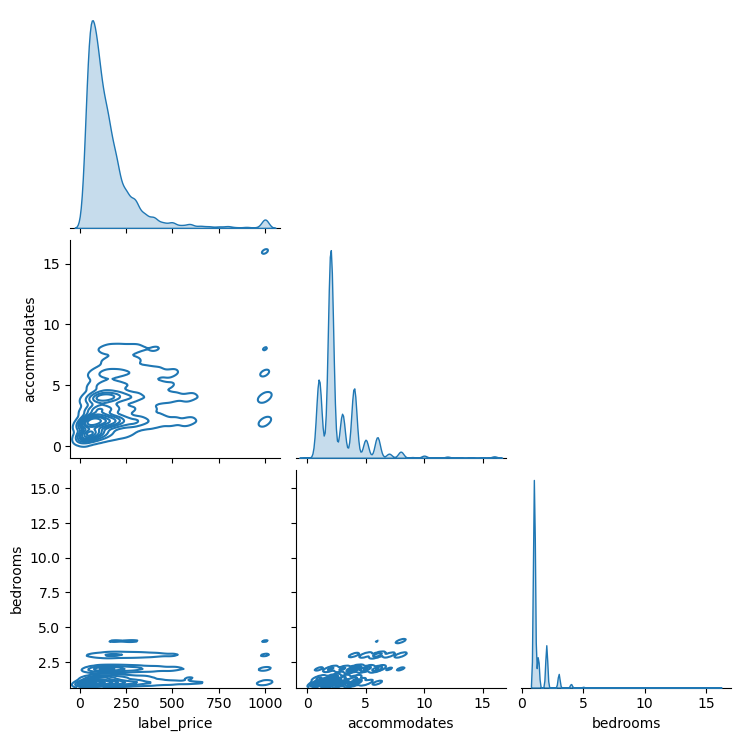

In [101]:
sns.pairplot(data=df_corrs, kind='kde', corner=True)